In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

Собственные числа:  
$\lambda_1 = 199$  
$\lambda_2 = -1$  
Плохая устойчивость



In [2]:
class RK4_var3:

    def __init__(self, t_init, t_final, h):
        self.rhs_matrix = np.array([[99, 250], 
                                    [40, 99]])
        
        _, self.eigenvectors = LA.eig(self.rhs_matrix)

        self.t_init = t_init
        self.t_final = t_final
        self.h = h
        self.init_state = self.eigenvectors[0]
        self.A = np.array([[-2.5, 2.5], [1, 1]])

    def solve(self):
        self.precise_solution_constants = LA.solve(self.A, self.init_state)

        self.number_of_steps = int((self.t_final - self.t_init) / self.h + 1)
        self.t_mesh = np.linspace(self.t_init, self.t_final, self.number_of_steps)
        self.u_values = np.zeros((self.number_of_steps, 2))
        self.u_values[0] = self.init_state
        
        for i in range(1, self.number_of_steps):
            k1 = np.dot(self.rhs_matrix, self.u_values[i - 1])
            k2 = np.dot(self.rhs_matrix, self.u_values[i - 1] + 0.5 * self.h * k1)
            k3 = np.dot(self.rhs_matrix, self.u_values[i - 1] + 0.5 * self.h * k2)
            k4 = np.dot(self.rhs_matrix, self.u_values[i - 1] + 1.0 * self.h * k3)

            self.u_values[i] = self.u_values[i - 1] + self.h * (k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6)

    def preciseSolution(self, t):
        self.solve()
        c1 = self.precise_solution_constants[0]
        c2 = self.precise_solution_constants[1]
        tmp = np.array([[-2.5 * c1, 2.5 * c2], [c1, c2]])
        tmp1 = np.array((np.exp(-t), np.exp(199 * t)))
        return np.dot(tmp, tmp1).transpose()

    def setInitState(self, init_state):
        if init_state == 'Eig1':
            self.init_state = self.eigenvectors[0]
        elif init_state == 'Eig2':
            self.init_state = self.eigenvectors[1]
        else:
            self.init_state = init_state


In [16]:
rk4 = RK4_var3(0., 1., 0.1)
rk4.solve()
y1_precise = rk4.preciseSolution(rk4.t_mesh)[:, 0]
y1 = rk4.u_values[:, 0]
delta_1 = np.abs(y1_precise - y1)
y2_precise = rk4.preciseSolution(rk4.t_mesh)[:, 1]
y2 = rk4.u_values[:, 1]
delta_2 = np.abs(y2_precise - y2)

In [17]:
df = pd.DataFrame(index= ['y1', 'y1_precise', 'delta_1', 'y2', 'y2_precise', 'delta_2'], columns=[f'{i:.1f}' for i in rk4.t_mesh], dtype=np.float64)
df.loc['y1'] = [y1[t] for t in range(rk4.t_mesh.size)]
df.loc['y1_precise'] = [y1_precise[t] for t in range(rk4.t_mesh.size)]
df.loc['delta_1'] = [delta_1[t] for t in range(rk4.t_mesh.size)]
df.loc['y2'] = [y2[t] for t in range(rk4.t_mesh.size)]
df.loc['y2_precise'] = [y2_precise[t] for t in range(rk4.t_mesh.size)]
df.loc['delta_2'] = [delta_2[t] for t in range(rk4.t_mesh.size)]


In [18]:
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
y1,9.284767e-01,-5.615815e+03,-4.531277e+07,-3.655231e+11,-2.948554e+15,-2.378500e+19,-1.918657e+23,-1.547717e+27,-1.248492e+31,-1.007117e+35,-8.124080e+38
y1_precise,9.284767e-01,-3.056979e+08,-1.342000e+17,-5.891323e+25,-2.586265e+34,-1.135359e+43,-4.984176e+51,-2.188032e+60,-9.605363e+68,-4.216712e+77,-1.851118e+86
delta_1,0.000000e+00,3.056923e+08,1.342000e+17,5.891323e+25,2.586265e+34,1.135359e+43,4.984176e+51,2.188032e+60,9.605363e+68,4.216712e+77,1.851118e+86
y2,-9.284767e-01,-2.247502e+03,-1.812511e+07,-1.462092e+11,-1.179421e+15,-9.514002e+18,-7.674629e+22,-6.190869e+26,-4.993968e+30,-4.028469e+34,-3.249632e+38
y2_precise,-9.284767e-01,-1.222792e+08,-5.368002e+16,-2.356529e+25,-1.034506e+34,-4.541436e+42,-1.993671e+51,-8.752127e+59,-3.842145e+68,-1.686685e+77,-7.404473e+85
delta_2,1.110223e-16,1.222769e+08,5.368002e+16,2.356529e+25,1.034506e+34,4.541436e+42,1.993671e+51,8.752127e+59,3.842145e+68,1.686685e+77,7.404473e+85


In [76]:
hs = [1 / (2 ** i) for i in range(10, 16)]

errors = []

for h in hs:
    rk4_test = RK4_var3(0., 1., h)
    rk4_test.solve()
    sol = rk4_test.u_values
    prec = rk4_test.preciseSolution(rk4_test.t_mesh)
    errors.append(np.max(LA.norm(sol - prec, axis=1)))

[192.50289016 189.81192709 187.07981803 184.32745918 181.56498797
 178.79746113]


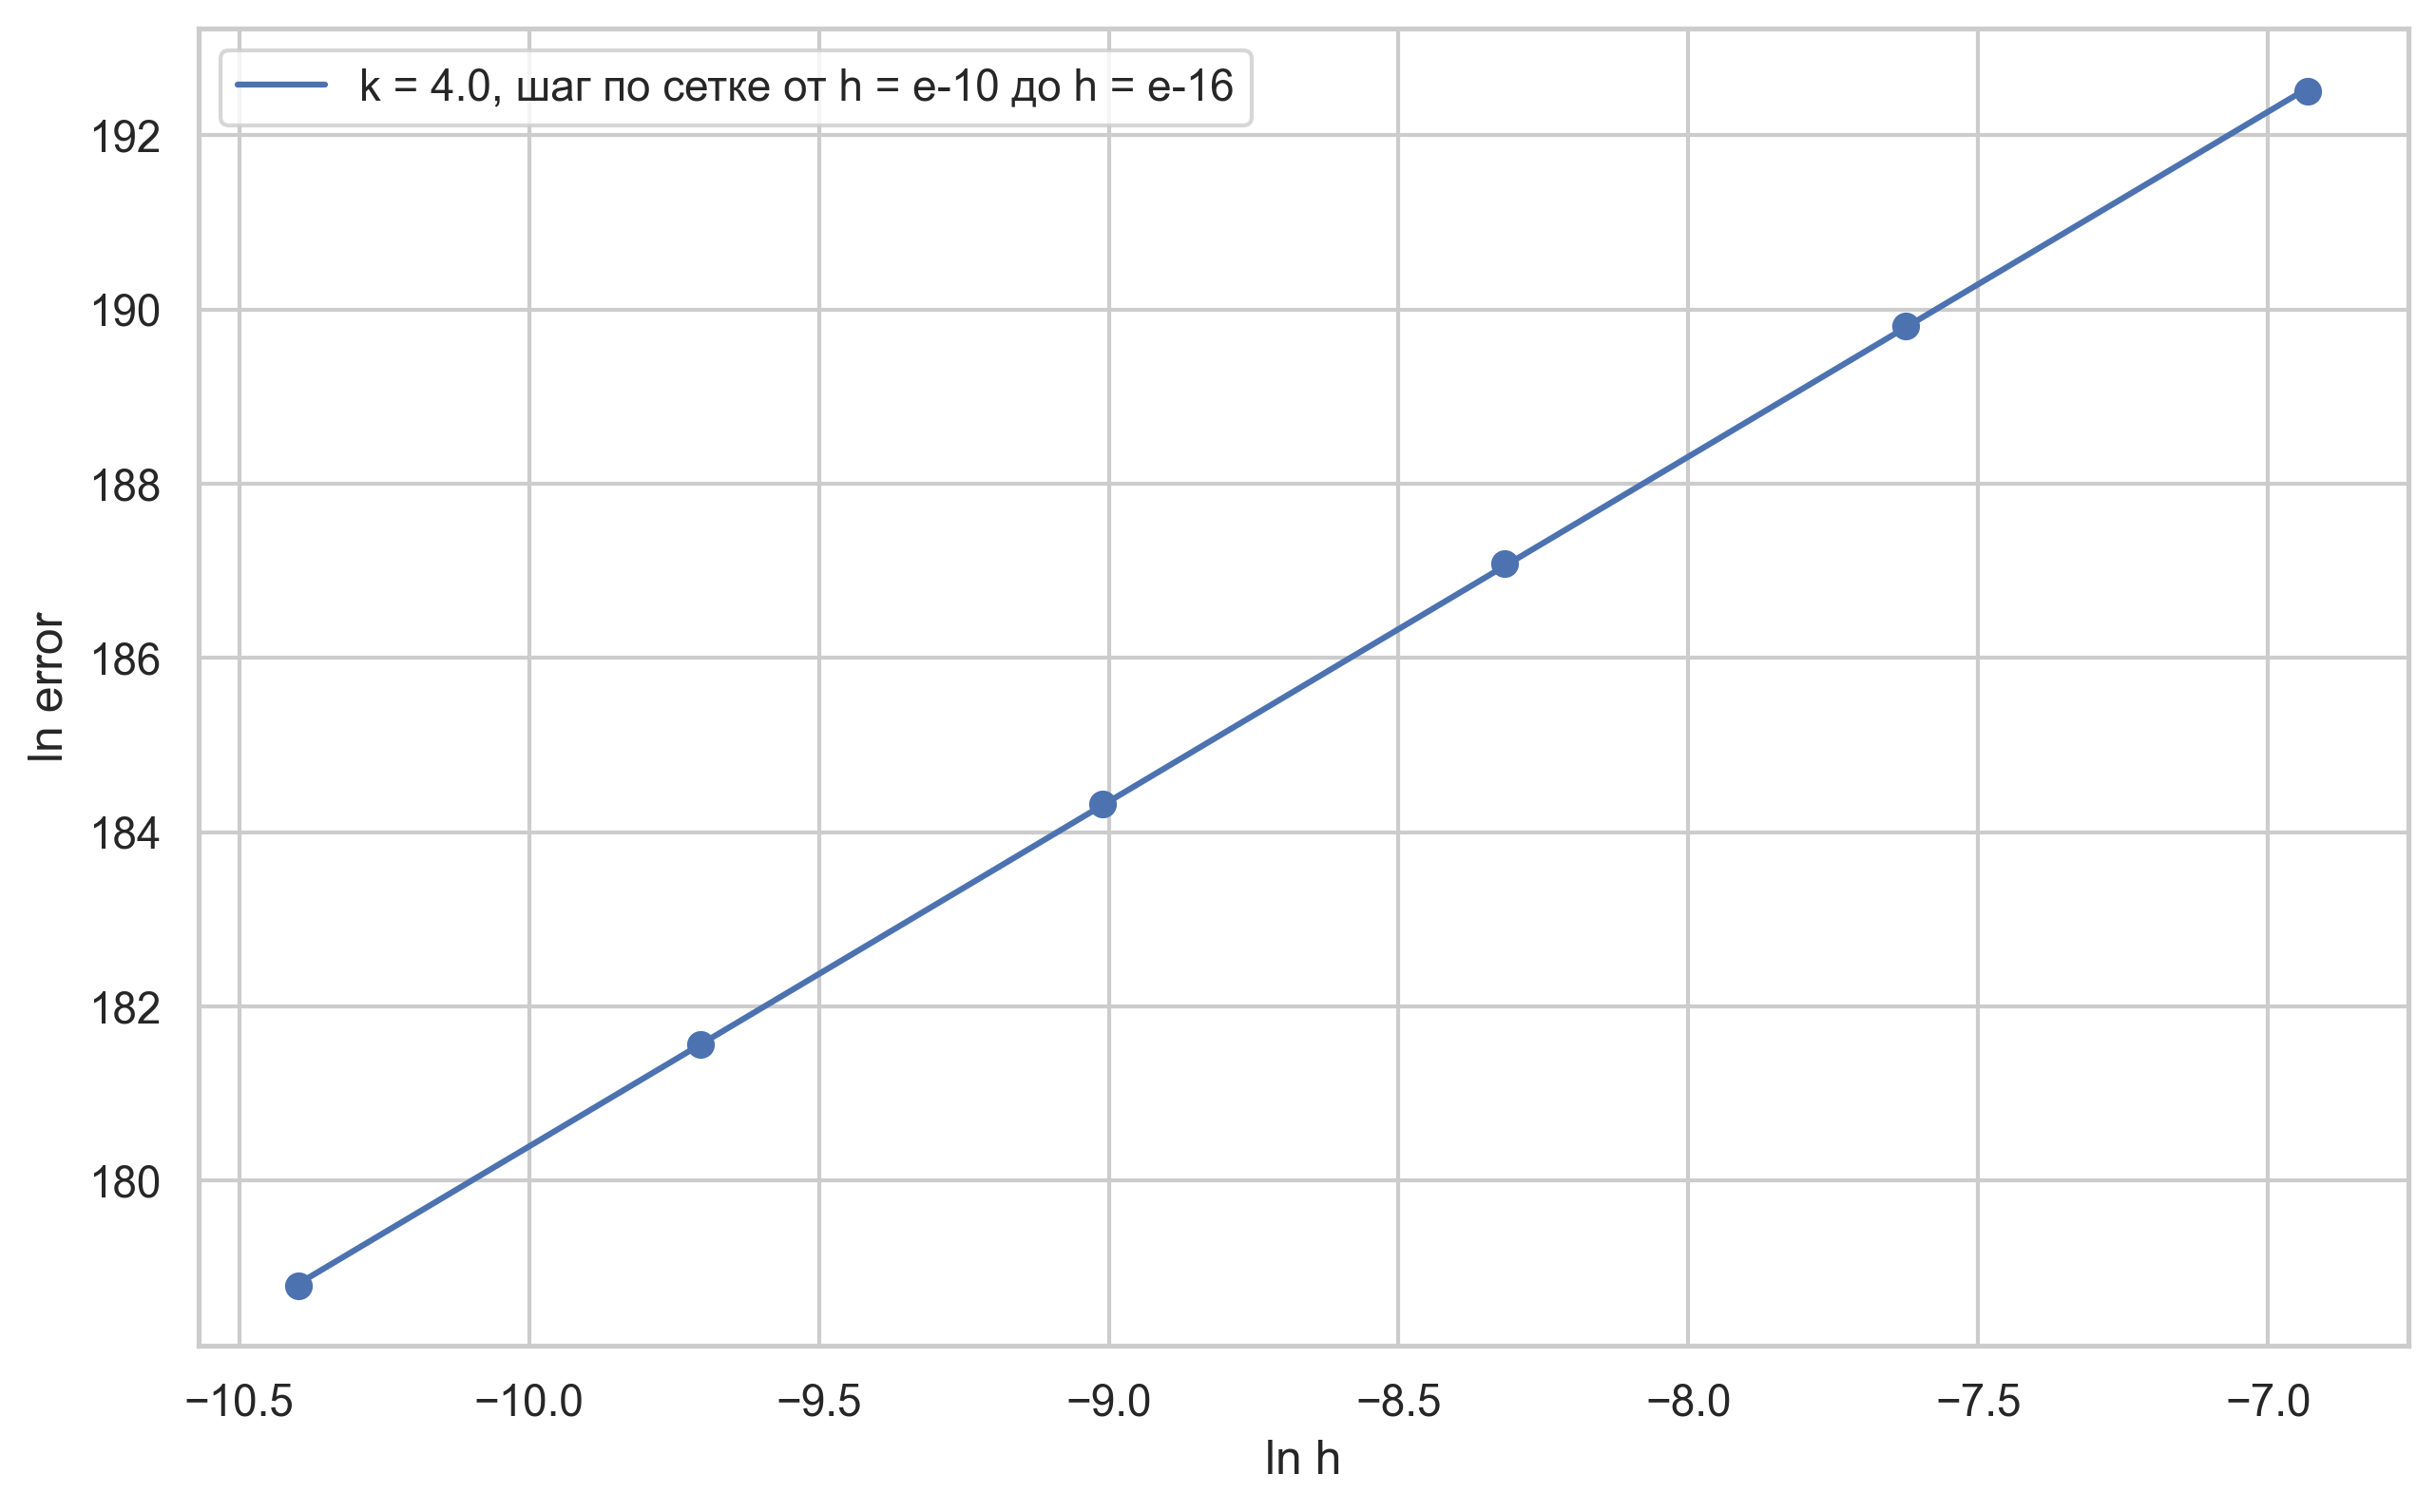

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')


x = np.log(hs)
y = np.log(errors)
plf = np.polyfit(x, y, 1)
yy = np.polyval(plf, x)

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(x, y)
plt.plot(x, yy, label = f'k = {plf[0]:.1f}, шаг по сетке от h = e-10 до h = e-16')
plt.xlabel('ln h')
plt.ylabel('ln error')
plt.legend()
print(np.log(errors))